In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

pd.set_option("max_columns", 999)
pd.set_option("max_rows", 999)

# 모델설정
sm = SMOTE(ratio='auto', kind='regular')

Using TensorFlow backend.


In [2]:
final = pd.read_csv('data_perday_alpha.csv', index_col = 'Unnamed: 0')
model_data = final.copy()

In [3]:
model_data.head()

,login_count,play_time,max_level,playtime_per_day,abyss,sit_count,exp_get_amout,money_get_count,teleport_count,killed_by_pc,killed_by_npc,reborn_count,login_total_day,sit_count_perday,login_total_day.1,item_get_count_perday,money_get_count_perday,use_portal_count_perday,teleport_count_perday,total_party_time,sit_count/play_time,killed_by_pc/play_time,killed_by_npc/play_time,total-party_time/play_time,teleport_count/play_time,play_time/login_count,exp_get_amount/play_time,playtime_per_day/login_total_day,max_level/login_count,reborn_count/login_count,sit_count/max_level,play_time/question_count,class
0,259.0,637926.0,0.0,42528.40000,0.0,270.0,3.891496e+08,4686.0,376.0,47.0,30.0,51.0,15.0,18.000000,15.0,2076.600000,312.400000,0.000000,25.066667,8862.0,0.000423,0.000074,0.000047,0.013892,0.000589,2463.034749,610.023075,2835.226667,0.000000,0.196911,0.000000,10289.129032,0
1,38.0,401885.0,42.0,28706.07143,0.0,153.0,8.011943e+07,1596.0,343.0,32.0,75.0,75.0,14.0,10.928571,14.0,4398.500000,114.000000,0.000000,24.500000,69458.0,0.000381,0.000080,0.000187,0.172831,0.000853,10575.921053,199.359088,2050.433674,1.105263,1.973684,3.642857,68.197013,0
2,43.0,240334.0,38.0,17166.71429,0.0,378.0,1.424854e+08,1318.0,337.0,35.0,53.0,69.0,14.0,27.000000,14.0,1763.285714,94.142857,0.000000,24.071429,43619.0,0.001573,0.000146,0.000221,0.181493,0.001402,5589.162791,592.864002,1226.193878,0.883721,1.604651,9.947368,2477.670103,0
3,25.0,1205493.0,0.0,80366.20000,0.0,207.0,1.377553e+09,7979.0,44.0,0.0,12.0,10.0,15.0,13.800000,15.0,7319.666667,531.933333,0.000000,2.933333,0.0,0.000172,0.000000,0.000010,0.000000,0.000036,48219.720000,1142.729893,5357.746667,0.000000,0.400000,0.000000,0.000000,0
4,110.0,457433.0,0.0,30495.53333,0.0,320.0,3.950991e+08,3551.0,568.0,311.0,109.0,261.0,15.0,21.333333,15.0,6557.866667,236.733333,0.066667,37.866667,40934.0,0.000700,0.000680,0.000238,0.089486,0.001242,4158.481818,863.731014,2033.035555,0.000000,2.372727,0.000000,5717.912500,0


# Model Training

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
#import xgboost as xgb

In [5]:
x = model_data.iloc[:, :-1]
y = model_data.iloc[:, -1]

In [6]:
model_data.head()

,login_count,play_time,max_level,playtime_per_day,abyss,sit_count,exp_get_amout,money_get_count,teleport_count,killed_by_pc,killed_by_npc,reborn_count,login_total_day,sit_count_perday,login_total_day.1,item_get_count_perday,money_get_count_perday,use_portal_count_perday,teleport_count_perday,total_party_time,sit_count/play_time,killed_by_pc/play_time,killed_by_npc/play_time,total-party_time/play_time,teleport_count/play_time,play_time/login_count,exp_get_amount/play_time,playtime_per_day/login_total_day,max_level/login_count,reborn_count/login_count,sit_count/max_level,play_time/question_count,class
0,259.0,637926.0,0.0,42528.40000,0.0,270.0,3.891496e+08,4686.0,376.0,47.0,30.0,51.0,15.0,18.000000,15.0,2076.600000,312.400000,0.000000,25.066667,8862.0,0.000423,0.000074,0.000047,0.013892,0.000589,2463.034749,610.023075,2835.226667,0.000000,0.196911,0.000000,10289.129032,0
1,38.0,401885.0,42.0,28706.07143,0.0,153.0,8.011943e+07,1596.0,343.0,32.0,75.0,75.0,14.0,10.928571,14.0,4398.500000,114.000000,0.000000,24.500000,69458.0,0.000381,0.000080,0.000187,0.172831,0.000853,10575.921053,199.359088,2050.433674,1.105263,1.973684,3.642857,68.197013,0
2,43.0,240334.0,38.0,17166.71429,0.0,378.0,1.424854e+08,1318.0,337.0,35.0,53.0,69.0,14.0,27.000000,14.0,1763.285714,94.142857,0.000000,24.071429,43619.0,0.001573,0.000146,0.000221,0.181493,0.001402,5589.162791,592.864002,1226.193878,0.883721,1.604651,9.947368,2477.670103,0
3,25.0,1205493.0,0.0,80366.20000,0.0,207.0,1.377553e+09,7979.0,44.0,0.0,12.0,10.0,15.0,13.800000,15.0,7319.666667,531.933333,0.000000,2.933333,0.0,0.000172,0.000000,0.000010,0.000000,0.000036,48219.720000,1142.729893,5357.746667,0.000000,0.400000,0.000000,0.000000,0
4,110.0,457433.0,0.0,30495.53333,0.0,320.0,3.950991e+08,3551.0,568.0,311.0,109.0,261.0,15.0,21.333333,15.0,6557.866667,236.733333,0.066667,37.866667,40934.0,0.000700,0.000680,0.000238,0.089486,0.001242,4158.481818,863.731014,2033.035555,0.000000,2.372727,0.000000,5717.912500,0


In [5]:
print(list(y).count(0))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

7500


# Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
#500개의 DT classifier만듬. 각 DT당 최대 16개의 leaf node, n_jobs -> cpu 코어 몇개 쓸지
rnd_clf = RandomForestClassifier(n_estimators=300, max_leaf_nodes=2, criterion='gini', max_depth = 3, n_jobs=6)
rnd_clf.fit(x_train, y_train)
y_pred_rf = rnd_clf.predict(x_test)

## RF Proba Manipulation

## RF Result

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf, target_names=['Human', 'Bot']))

              precision    recall  f1-score   support

       Human       0.93      1.00      0.96      2254
         Bot       0.00      0.00      0.00       176

    accuracy                           0.93      2430
   macro avg       0.46      0.50      0.48      2430
weighted avg       0.86      0.93      0.89      2430



D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [20]:
from sklearn.metrics import accuracy_score, f1_score
print("Accuracy: %.2f" %accuracy_score(y_test, y_pred_rf))
print("F1 score: %.2f" %f1_score(y_test, y_pred_rf))

Accuracy: 0.93
F1 score: 0.00


D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


## Proba Manipulation Result

In [22]:
rf_proba = rnd_clf.predict_proba(x_test)[:,0]

x = np.arange(0, 1.01, 0.01)
y = np.arange(0, 1.01, 0.01)
z = np.arange(0, 1.01, 0.01)

for i in np.arange(0, 1.01, 0.01):
    y_pred_rf = ((rf_proba) > i).astype(int)
    y[int(i*100)] = accuracy_score(y_test, y_pred_rf)
    z[int(i*100)] = f1_score(y_test, y_pred_rf)

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [23]:
max(z)

0.58

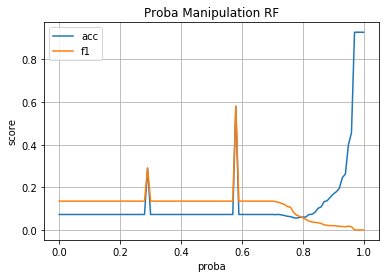

In [24]:
ax = plt.subplot(111)

ax.plot(x, y, label='acc')
ax.plot(x, z, label='f1')

ax.set(xlabel='proba', ylabel='score', title='Proba Manipulation RF')
ax.legend(loc='upper left')
ax.grid()

# Smote RF with Proba Manipulation

In [177]:
# train데이터를 넣어 복제함

x = model_data.iloc[:, :-1]
y = model_data.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

X_resampled, Y_resampled = sm.fit_sample(x_train,y_train)

#500개의 DT classifier만듬. 각 DT당 최대 16개의 leaf node, n_jobs -> cpu 코어 몇개 쓸지
rnd_clf = RandomForestClassifier(n_estimators=300, max_leaf_nodes=2, criterion='gini', max_depth = 3, n_jobs=6)
rnd_clf.fit(X_resampled, Y_resampled)
y_pred_rf = rnd_clf.predict_proba(x_test)[:,1]

In [178]:
x1 = np.arange(0, 1.01, 0.01)
y1 = np.arange(0, 1.01, 0.01)
z1 = np.arange(0, 1.01, 0.01)

from sklearn.metrics import accuracy_score, f1_score

for i in np.arange(0, 1.01, 0.01):
    y_pred = ((y_pred_rf) > i).astype(int)
    y1[int(i*100)] = accuracy_score(y_test, y_pred)
    z1[int(i*100)] = f1_score(y_test, y_pred)

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


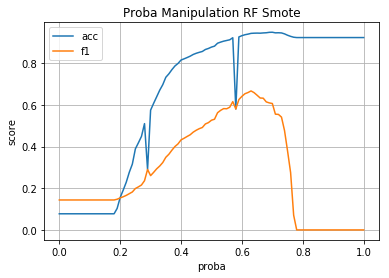

In [179]:
ax = plt.subplot(111)

ax.plot(x1, y1, label='acc')
ax.plot(x1, z1, label='f1')

ax.set(xlabel='proba', ylabel='score', title='Proba Manipulation RF Smote')
ax.legend(loc='upper left')
ax.grid()

# 로지스틱

In [31]:
from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler(feature_range=(0, 1))
# scaler.fit_transform(x_train)
# x_train = scaler.fit_transform(x_train)

from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(estimators=[("lr", log_clf),("rf", rnd_clf),("svc", svm_clf)], voting="hard")

log_clf.fit(x_train, y_train)
#log_clf.fit(X_resampled, Y_resampled)
# y_pred = log_clf.predict(X_test)
pred_log = log_clf.predict_proba(x_test)[:,1]

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [54]:
pred_log

array([0.01073914, 0.32638337, 0.02557662, ..., 0.45676856, 0.04370589,
       0.11018889])

In [180]:
x1 = np.arange(0, 1.01, 0.01)
y1 = np.arange(0, 1.01, 0.01)
z1 = np.arange(0, 1.01, 0.01)

from sklearn.metrics import accuracy_score, f1_score

for i in np.arange(0, 1.01, 0.01):
    y_pred = ((pred_log) > i).astype(int)
    y1[int(i*100)] = accuracy_score(y_test, y_pred)
    z1[int(i*100)] = f1_score(y_test, y_pred)

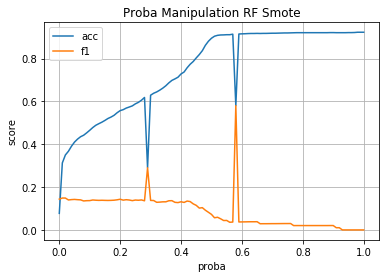

In [181]:
ax = plt.subplot(111)

ax.plot(x1, y1, label='acc')
ax.plot(x1, z1, label='f1')

ax.set(xlabel='proba', ylabel='score', title='Proba Manipulation RF Smote')
ax.legend(loc='upper left')
ax.grid()

In [85]:
from sklearn.ensemble import IsolationForest

# train데이터를 넣어 복제함

x = model_data.iloc[:, :-1]
y = model_data.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

X_resampled, Y_resampled = sm.fit_sample(x_train,y_train)

#500개의 DT classifier만듬. 각 DT당 최대 16개의 leaf node, n_jobs -> cpu 코어 몇개 쓸지
if_clf = IsolationForest(n_estimators=1000, max_samples=100, n_jobs=6)
if_clf.fit(X_resampled, Y_resampled)
y_pred_if = if_clf.score_samples(x_test)

D:\Anaconda\lib\site-packages\sklearn\ensemble\iforest.py:237: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


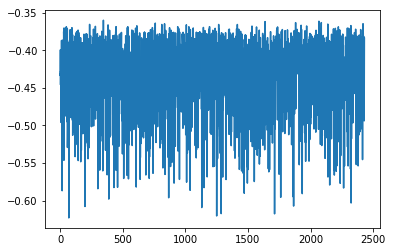

In [86]:
plt.plot(y_pred_if)

In [192]:
x1 = np.arange(min(y_pred_if), max(y_pred_if)+0.01, 0.01)
y1 = np.arange(min(y_pred_if), max(y_pred_if)+0.01, 0.01)
z1 = np.arange(min(y_pred_if), max(y_pred_if)+0.01, 0.01)

for i in range(0, len(x1)):
    y_pred = ((y_pred_if ) < x1[i]).astype(int)
    y1[i] = accuracy_score(y_test, y_pred)
    z1[i] = f1_score(y_test, y_pred)

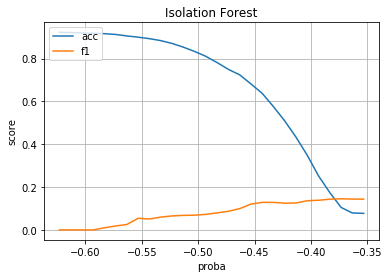

In [193]:
ax = plt.subplot(111)

ax.plot(x1, y1, label='acc')
ax.plot(x1, z1, label='f1')

ax.set(xlabel='proba', ylabel='score', title='Isolation Forest')
ax.legend(loc='upper left')
ax.grid()

# LocalOutlierFactor

In [146]:
from sklearn.neighbors import LocalOutlierFactor

In [147]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

In [148]:
y_pred_lof = clf.fit_predict(x)

In [149]:
y_pred = (y_pred_lof == -1).astype(int)

In [150]:
f1_score(y, y_pred)

0.276595744680851

In [151]:
X_scores = clf.negative_outlier_factor_

In [152]:
X_scores

array([-0.97972362, -0.99799764, -1.0137042 , ..., -1.06803605,
       -1.05596264, -5.24986303])

In [190]:
x1 = np.arange(min(X_scores), max(X_scores)+0.01, 0.01)
y1 = np.arange(min(X_scores), max(X_scores)+0.01, 0.01)
z1 = np.arange(min(X_scores), max(X_scores)+0.01, 0.01)

for i in range(0, len(x1)):
    y_pred = ((X_scores) < x1[i]).astype(int)
    y1[i] = accuracy_score(y, y_pred)
    z1[i] = f1_score(y, y_pred)

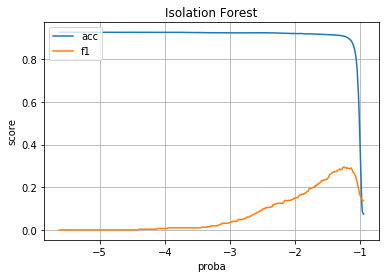

In [191]:
ax = plt.subplot(111)

ax.plot(x1, y1, label='acc')
ax.plot(x1, z1, label='f1')

ax.set(xlabel='proba', ylabel='score', title='Isolation Forest')
ax.legend(loc='upper left')
ax.grid()

# xgboost

In [7]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [7]:
xgb_model = xgb.XGBClassifier(n_estimators=1000,
                        n_jobs=6,
                        max_depth=5,
                        learning_rate=0.1,
                        gamma = 0,
                        subsample = 0.8,
                        scale_pos_weight = 1,
                        min_child_weight=1,
                        colsample_bytree=0.8,
                        objective= 'binary:logistic',
                        nthread=4,
                        missing=-999,
                        seed=27,
                        tree_method='gpu_hist')

In [8]:
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=-999, n_estimators=1000, n_jobs=6,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, tree_method='gpu_hist', verbosity=1)

In [242]:
prediction = xgb_model.predict(x_test)

In [243]:
f1_score(y_test, prediction)

0.8396501457725948

In [248]:
xgb_model.feature_importances_

array([0.02010887, 0.03873175, 0.03006781, 0.05699639, 0.0224487 ,
       0.01884767, 0.02989258, 0.01567309, 0.01918903, 0.01678813,
       0.01684588, 0.01841115, 0.08368526, 0.02004064, 0.04671659,
       0.02265745, 0.01938679, 0.0196137 , 0.0167173 , 0.01699952,
       0.02372348, 0.01259968, 0.01754391, 0.02645882, 0.02869268,
       0.02879749, 0.0540796 , 0.09562229, 0.015855  , 0.01432654,
       0.06419432, 0.06828786], dtype=float32)

<BarContainer object of 32 artists>

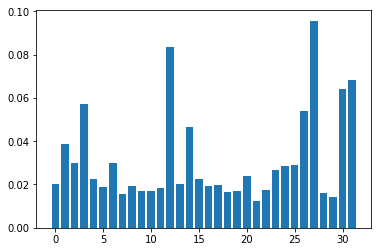

In [252]:
plt.bar(range(len(xgb_model.feature_importances_)), xgb_model.feature_importances_)

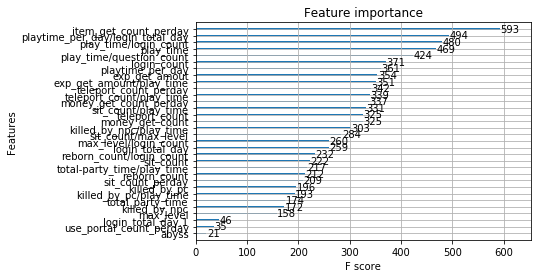

In [256]:
from xgboost import plot_importance
from matplotlib import pyplot

plot_importance(xgb_model)
pyplot.show()

In [270]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel

# make predictions for test data and evaluate
y_pred = xgb_model.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(xgb_model.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(xgb_model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(x_train)
	# train model
	selection_model = xgb.XGBClassifier()
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(x_test)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	f1 = f1_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%, f1: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0, f1*100.0))

Accuracy: 97.74%
Thresh=0.013, n=32, Accuracy: 97.41%, f1: 81.74%
Thresh=0.014, n=31, Accuracy: 97.41%, f1: 81.74%
Thresh=0.016, n=30, Accuracy: 97.45%, f1: 82.08%
Thresh=0.016, n=29, Accuracy: 97.33%, f1: 81.05%
Thresh=0.017, n=28, Accuracy: 97.41%, f1: 81.63%
Thresh=0.017, n=27, Accuracy: 97.41%, f1: 81.74%
Thresh=0.017, n=26, Accuracy: 97.45%, f1: 82.08%
Thresh=0.017, n=25, Accuracy: 97.41%, f1: 81.74%
Thresh=0.018, n=24, Accuracy: 97.33%, f1: 81.05%
Thresh=0.018, n=23, Accuracy: 97.41%, f1: 81.74%
Thresh=0.019, n=22, Accuracy: 97.37%, f1: 81.40%
Thresh=0.019, n=21, Accuracy: 97.41%, f1: 81.74%
Thresh=0.019, n=20, Accuracy: 97.20%, f1: 80.23%
Thresh=0.020, n=19, Accuracy: 97.28%, f1: 80.81%
Thresh=0.020, n=18, Accuracy: 97.24%, f1: 80.58%
Thresh=0.020, n=17, Accuracy: 97.33%, f1: 81.16%
Thresh=0.022, n=16, Accuracy: 97.28%, f1: 80.81%
Thresh=0.023, n=15, Accuracy: 97.33%, f1: 81.16%
Thresh=0.024, n=14, Accuracy: 97.20%, f1: 80.35%
Thresh=0.026, n=13, Accuracy: 97.12%, f1: 79.41%
Thr

## Grid Search

In [6]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [25]:
max_depth = [8]
min_child_weight = [3]
gamma = [0]
subsample = [0.8]
colsample_bytree = [0.7]
reg_alpha = [0.3]

random_grid = {'min_child_weight': min_child_weight,
               'max_depth': max_depth,
               'gamma': gamma,
               'subsample': subsample,
               'colsample_bytree': colsample_bytree,
               'reg_alpha': reg_alpha}
print(random_grid)

{'min_child_weight': [3], 'max_depth': [8], 'gamma': [0], 'subsample': [0.8], 'colsample_bytree': [0.7], 'reg_alpha': [0.3]}


In [26]:
from joblib import Parallel
Parallel(max_nbytes=None)

Parallel(n_jobs=1)

In [24]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
xgb_model = xgb.XGBClassifier(n_estimators=1000,
                        n_jobs=6,
                        learning_rate=0.1,
                        gamma = 0,
                        subsample = 0.8,
                        scale_pos_weight = 1,
                        colsample_bytree=0.8,
                        objective= 'binary:logistic',
                        nthread=4,
                        missing=-999,
                        seed=27,
                        tree_method='gpu_hist')
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
xgb_grid =  GridSearchCV(xgb_model, param_grid =  random_grid, scoring ='f1', cv = 3, n_jobs = 2)
# Fit the random search model
xgb_model.fit(x_train, y_train)

D:\Anaconda\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=-999, n_estimators=1000, n_jobs=6,
                                     nthread=4, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=27, silent=None,
                                     subsample=0.8, tree_method='gpu_hist',
                                     verbosity=1),
             iid='warn', n_jobs=2,
             param_grid={'colsample_bytree': [0.7], 'gamma': [0],
                         'max_depth': [8], 

In [21]:
xgb_grid.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0,
 'max_depth': 8,
 'min_child_weight': 3,
 'reg_alpha': 0.3,
 'subsample': 0.8}

In [9]:
xgb_model = xgb.XGBClassifier(n_estimators=1000,
                        n_jobs=6,
                        learning_rate=0.1,
                        gamma = 0,
                        subsample = 0.8,
                        scale_pos_weight = 1,
                        colsample_bytree=0.7,
                        objective= 'binary:logistic',
                        nthread=4,
                        missing=-999,
                        seed=27,
                        min_child_weight=3,
                        reg_alpha=0.3,
                        tree_method='gpu_hist')
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=-999, n_estimators=1000, n_jobs=6,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, tree_method='gpu_hist', verbosity=1)

In [10]:
proba_xgb = xgb_model.predict_proba(x_test)[:,1]

## proba manipulation

In [11]:
x1 = np.arange(0, 1.01, 0.01)
y1 = np.arange(0, 1.01, 0.01)
z1 = np.arange(0, 1.01, 0.01)

from sklearn.metrics import accuracy_score, f1_score

for i in np.arange(0, 1.01, 0.01):
    y_pred = ((proba_xgb) > i).astype(int)
    y1[int(i*100)] = accuracy_score(y_test, y_pred)
    z1[int(i*100)] = f1_score(y_test, y_pred)

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


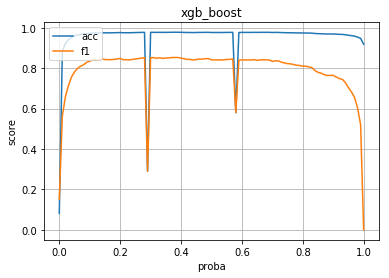

In [13]:
ax = plt.subplot(111)

ax.plot(x1, y1, label='acc')
ax.plot(x1, z1, label='f1')

ax.set(xlabel='proba', ylabel='score', title='xgb_boost')
ax.legend(loc='upper left')
ax.grid()

In [14]:
max(z1)

0.8525469168900806

In [15]:
xgb_model = xgb.XGBClassifier(n_estimators=5000,
                        n_jobs=6,
                        learning_rate=0.01,
                        gamma = 0,
                        subsample = 0.8,
                        scale_pos_weight = 1,
                        colsample_bytree=0.7,
                        objective= 'binary:logistic',
                        nthread=4,
                        missing=-999,
                        seed=27,
                        min_child_weight=3,
                        reg_alpha=0.3,
                        tree_method='gpu_hist')
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=-999, n_estimators=5000, n_jobs=6,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, tree_method='gpu_hist', verbosity=1)

In [16]:
proba_xgb = xgb_model.predict_proba(x_test)[:,1]

In [17]:
x1 = np.arange(0, 1.01, 0.01)
y1 = np.arange(0, 1.01, 0.01)
z1 = np.arange(0, 1.01, 0.01)

from sklearn.metrics import accuracy_score, f1_score

for i in np.arange(0, 1.01, 0.01):
    y_pred = ((proba_xgb) > i).astype(int)
    y1[int(i*100)] = accuracy_score(y_test, y_pred)
    z1[int(i*100)] = f1_score(y_test, y_pred)

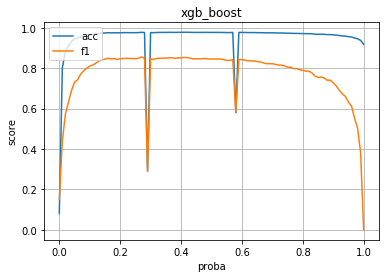

In [18]:
ax = plt.subplot(111)

ax.plot(x1, y1, label='acc')
ax.plot(x1, z1, label='f1')

ax.set(xlabel='proba', ylabel='score', title='xgb_boost')
ax.legend(loc='upper left')
ax.grid()

In [19]:
max(z1)

0.8556430446194226

In [20]:
max(y1)

0.9777777777777777

In [21]:
z1

array([0.15138836, 0.4416185 , 0.57186082, 0.63175676, 0.68926554,
       0.73053892, 0.74273859, 0.76989247, 0.78681319, 0.8       ,
       0.81018519, 0.81516588, 0.82494005, 0.83495146, 0.84107579,
       0.84444444, 0.84924623, 0.84556962, 0.84693878, 0.84398977,
       0.84615385, 0.84832905, 0.84832905, 0.84832905, 0.84754522,
       0.84675325, 0.84895833, 0.85564304, 0.84960422, 0.29      ,
       0.84656085, 0.84350133, 0.848     , 0.84946237, 0.84946237,
       0.84946237, 0.85175202, 0.85175202, 0.84864865, 0.85094851,
       0.85094851, 0.85326087, 0.85245902, 0.84931507, 0.84615385,
       0.84615385, 0.84615385, 0.84615385, 0.84848485, 0.84530387,
       0.84530387, 0.84530387, 0.84530387, 0.84530387, 0.84210526,
       0.83888889, 0.83798883, 0.84269663, 0.58      , 0.84269663,
       0.84269663, 0.83943662, 0.83615819, 0.83615819, 0.83615819,
       0.83286119, 0.83094556, 0.8265896 , 0.82215743, 0.82215743,
       0.82215743, 0.81871345, 0.81524927, 0.81524927, 0.81176

## proba manipulation 3

In [27]:
xgb_model = xgb.XGBClassifier(n_estimators=10000,
                        n_jobs=6,
                        learning_rate=0.001,
                        gamma = 0,
                        subsample = 0.8,
                        scale_pos_weight = 1,
                        colsample_bytree=0.7,
                        objective= 'binary:logistic',
                        nthread=4,
                        missing=-999,
                        seed=27,
                        min_child_weight=3,
                        reg_alpha=0.3,
                        tree_method='gpu_hist')
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.001, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=-999, n_estimators=10000, n_jobs=6,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, tree_method='gpu_hist', verbosity=1)

In [28]:
proba_xgb = xgb_model.predict_proba(x_test)[:,1]

In [29]:
x1 = np.arange(0, 1.01, 0.01)
y1 = np.arange(0, 1.01, 0.01)
z1 = np.arange(0, 1.01, 0.01)

from sklearn.metrics import accuracy_score, f1_score

for i in np.arange(0, 1.01, 0.01):
    y_pred = ((proba_xgb) > i).astype(int)
    y1[int(i*100)] = accuracy_score(y_test, y_pred)
    z1[int(i*100)] = f1_score(y_test, y_pred)

D:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


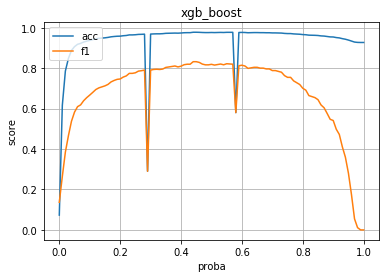

In [30]:
ax = plt.subplot(111)

ax.plot(x1, y1, label='acc')
ax.plot(x1, z1, label='f1')

ax.set(xlabel='proba', ylabel='score', title='xgb_boost')
ax.legend(loc='upper left')
ax.grid()

In [31]:
z1

array([0.13650307, 0.26498423, 0.38488784, 0.46599132, 0.53716216,
       0.58241758, 0.609375  , 0.61818182, 0.6388309 , 0.65384615,
       0.66666667, 0.68008949, 0.69406393, 0.70232558, 0.70725995,
       0.71226415, 0.71942446, 0.73170732, 0.73891626, 0.74441687,
       0.74626866, 0.75566751, 0.76142132, 0.77402597, 0.77402597,
       0.77690289, 0.78514589, 0.78723404, 0.79032258, 0.29      ,
       0.79019074, 0.79338843, 0.79444444, 0.79329609, 0.79545455,
       0.80346821, 0.8057971 , 0.80813953, 0.81049563, 0.80588235,
       0.80952381, 0.81681682, 0.81927711, 0.81927711, 0.83180428,
       0.83180428, 0.82822086, 0.81987578, 0.81619938, 0.81619938,
       0.81875   , 0.81504702, 0.81761006, 0.82018927, 0.8164557 ,
       0.82165605, 0.82051282, 0.81935484, 0.58      , 0.81168831,
       0.81433225, 0.81045752, 0.79867987, 0.8013245 , 0.80398671,
       0.80398671, 0.8       , 0.8       , 0.79598662, 0.79598662,
       0.78787879, 0.78787879, 0.78378378, 0.77966102, 0.76288

# creating labels for submission

In [10]:
xgb_model = xgb.XGBClassifier(n_estimators=5000,
                        n_jobs=6,
                        learning_rate=0.01,
                        gamma = 0,
                        subsample = 0.8,
                        scale_pos_weight = 1,
                        colsample_bytree=0.7,
                        objective= 'binary:logistic',
                        nthread=4,
                        missing=-999,
                        seed=27,
                        min_child_weight=3,
                        reg_alpha=0.3,
                        tree_method='gpu_hist')
xgb_model.fit(x, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=-999, n_estimators=5000, n_jobs=6,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0.3, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, tree_method='gpu_hist', verbosity=1)

In [12]:
test = pd.read_csv('dataset_for_creating_labels_for_submission.csv', index_col = 'Unnamed: 0')
test_data = test.copy()

In [13]:
accounts = pd.read_csv('test_accounts.csv')

In [14]:
test_accounts = pd.merge(accounts, test, how='inner', on = "account")

In [15]:
ts = test_accounts.copy()

In [16]:
del ts['account']

In [31]:
result = (xgb_model.predict_proba(ts)[:,1] > 0.27)

In [24]:
result = result.astype(int)

In [27]:
result = pd.DataFrame(result)

In [29]:
result.to_csv('result.csv')

In [30]:
result

,0
0,0
1,1
2,0
3,0
4,0
5,1
6,0
7,0
8,0
9,0


In [35]:
result

array([False,  True, False, ..., False, False, False])